# Make_blobs

In [1]:
from preamble import *

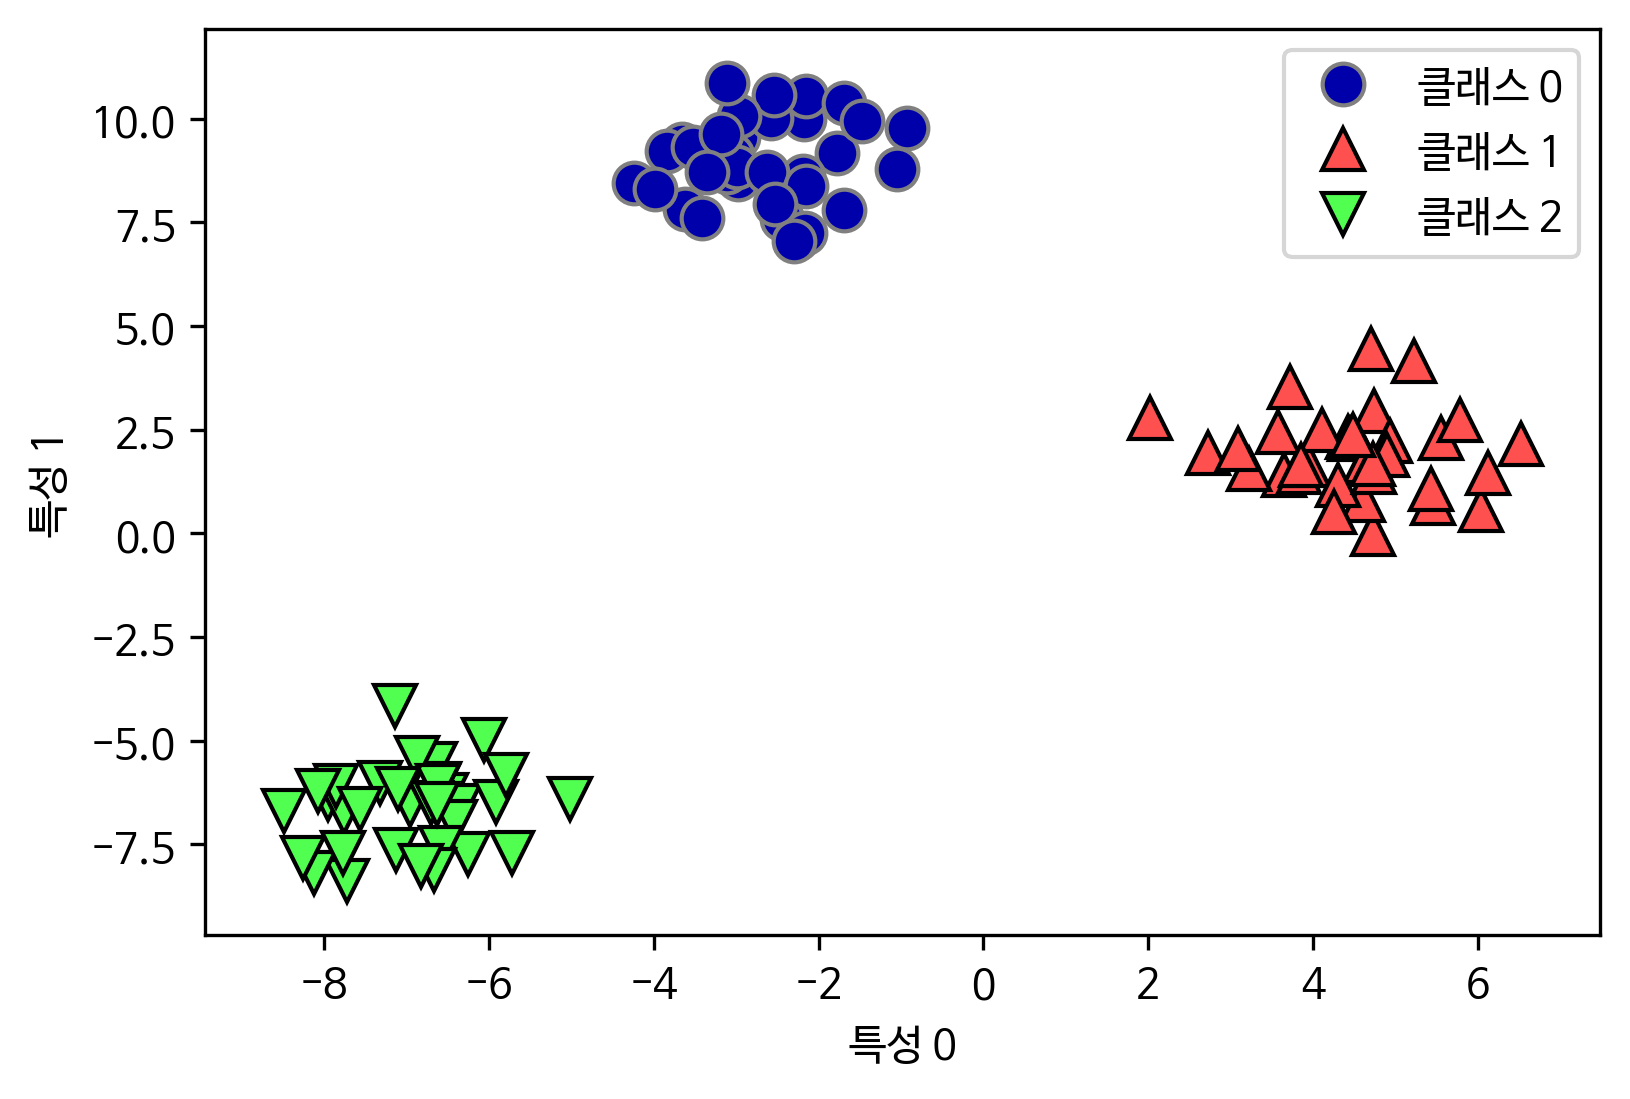

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(["클래스 0", "클래스 1", "클래스 2"])

# Multi-class

In [3]:
from sklearn.linear_model import LogisticRegression

logr_m = LogisticRegression(multi_class='multinomial').fit(X, y)
print("계수 배열의 크기: ", logr_m.coef_.shape)
print("절편 배열의 크기: ", logr_m.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열 : 
 [[-0.385  0.629]
 [ 0.741 -0.177]
 [-0.356 -0.452]]


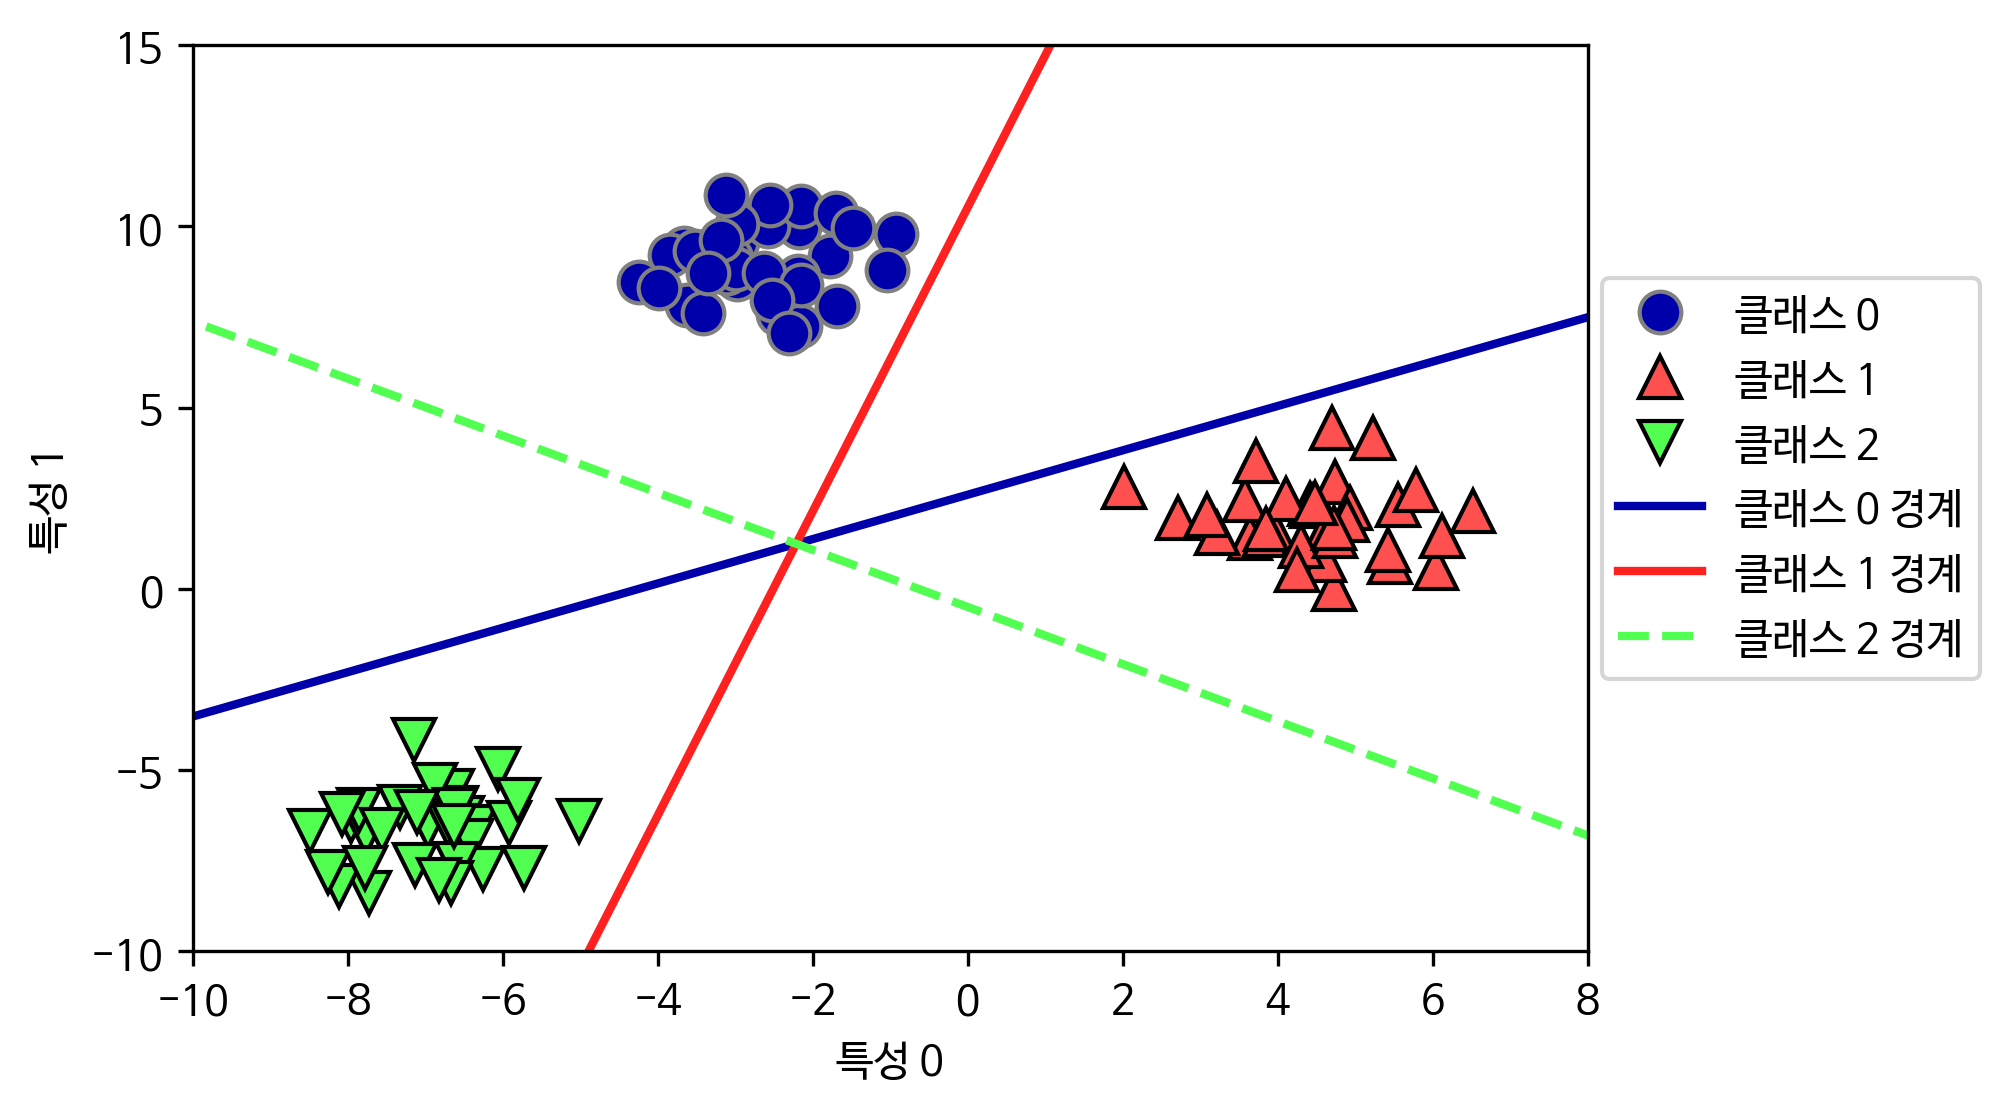

In [4]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr_m.coef_, logr_m.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
print("계수 배열 : \n", logr_m.coef_)

In [5]:
logr_b = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X, y)
print("계수 배열의 크기: ", logr_b.coef_.shape)
print("절편 배열의 크기: ", logr_b.intercept_.shape)

계수 배열의 크기:  (3, 2)
절편 배열의 크기:  (3,)


계수 배열 : 
 [[-0.605  0.871]
 [ 1.369 -0.287]
 [-0.729 -0.934]]


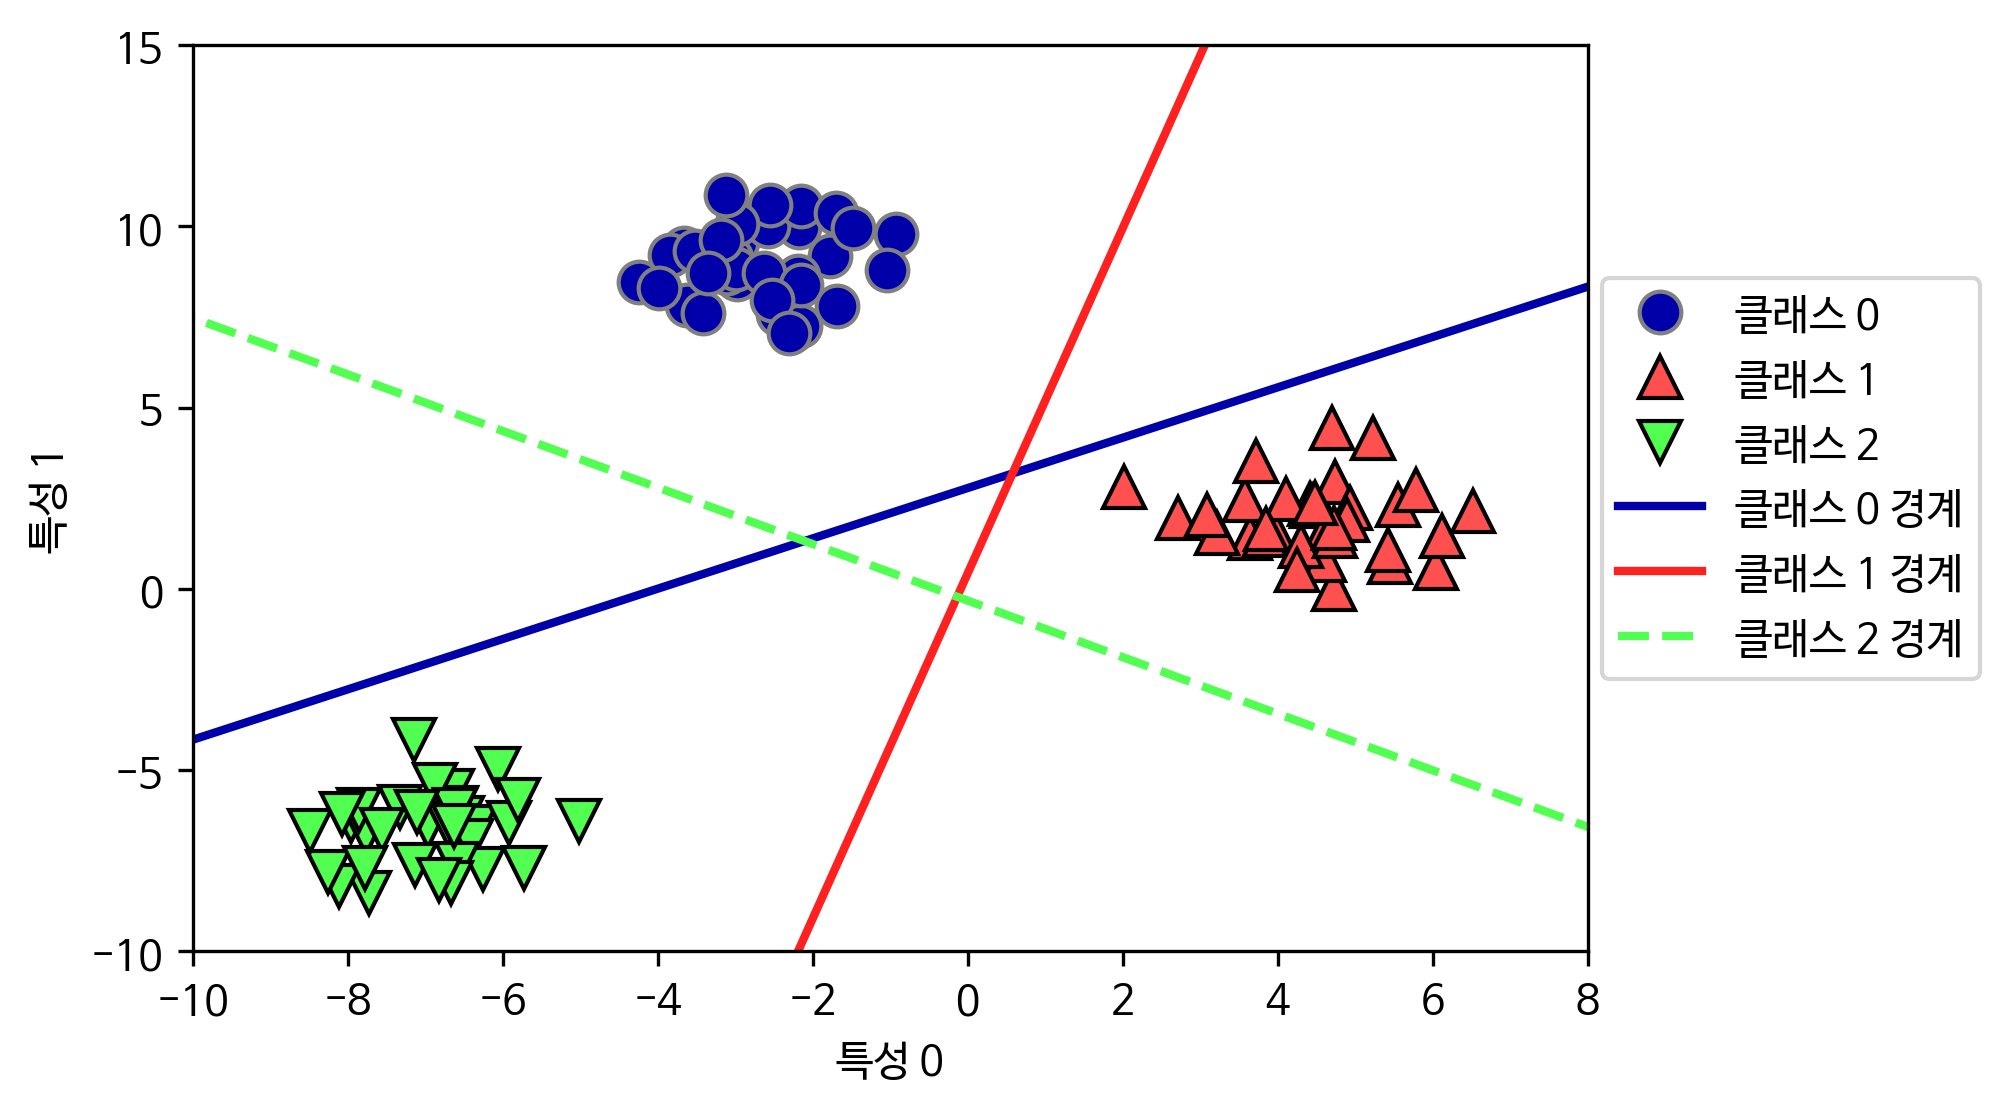

In [6]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr_b.coef_, logr_b.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("특성 0")
plt.ylabel("특성 1")
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
print("계수 배열 : \n", logr_b.coef_)

# 2차원 모든 데이터에 대한 예측

Text(0, 0.5, '특성 1')

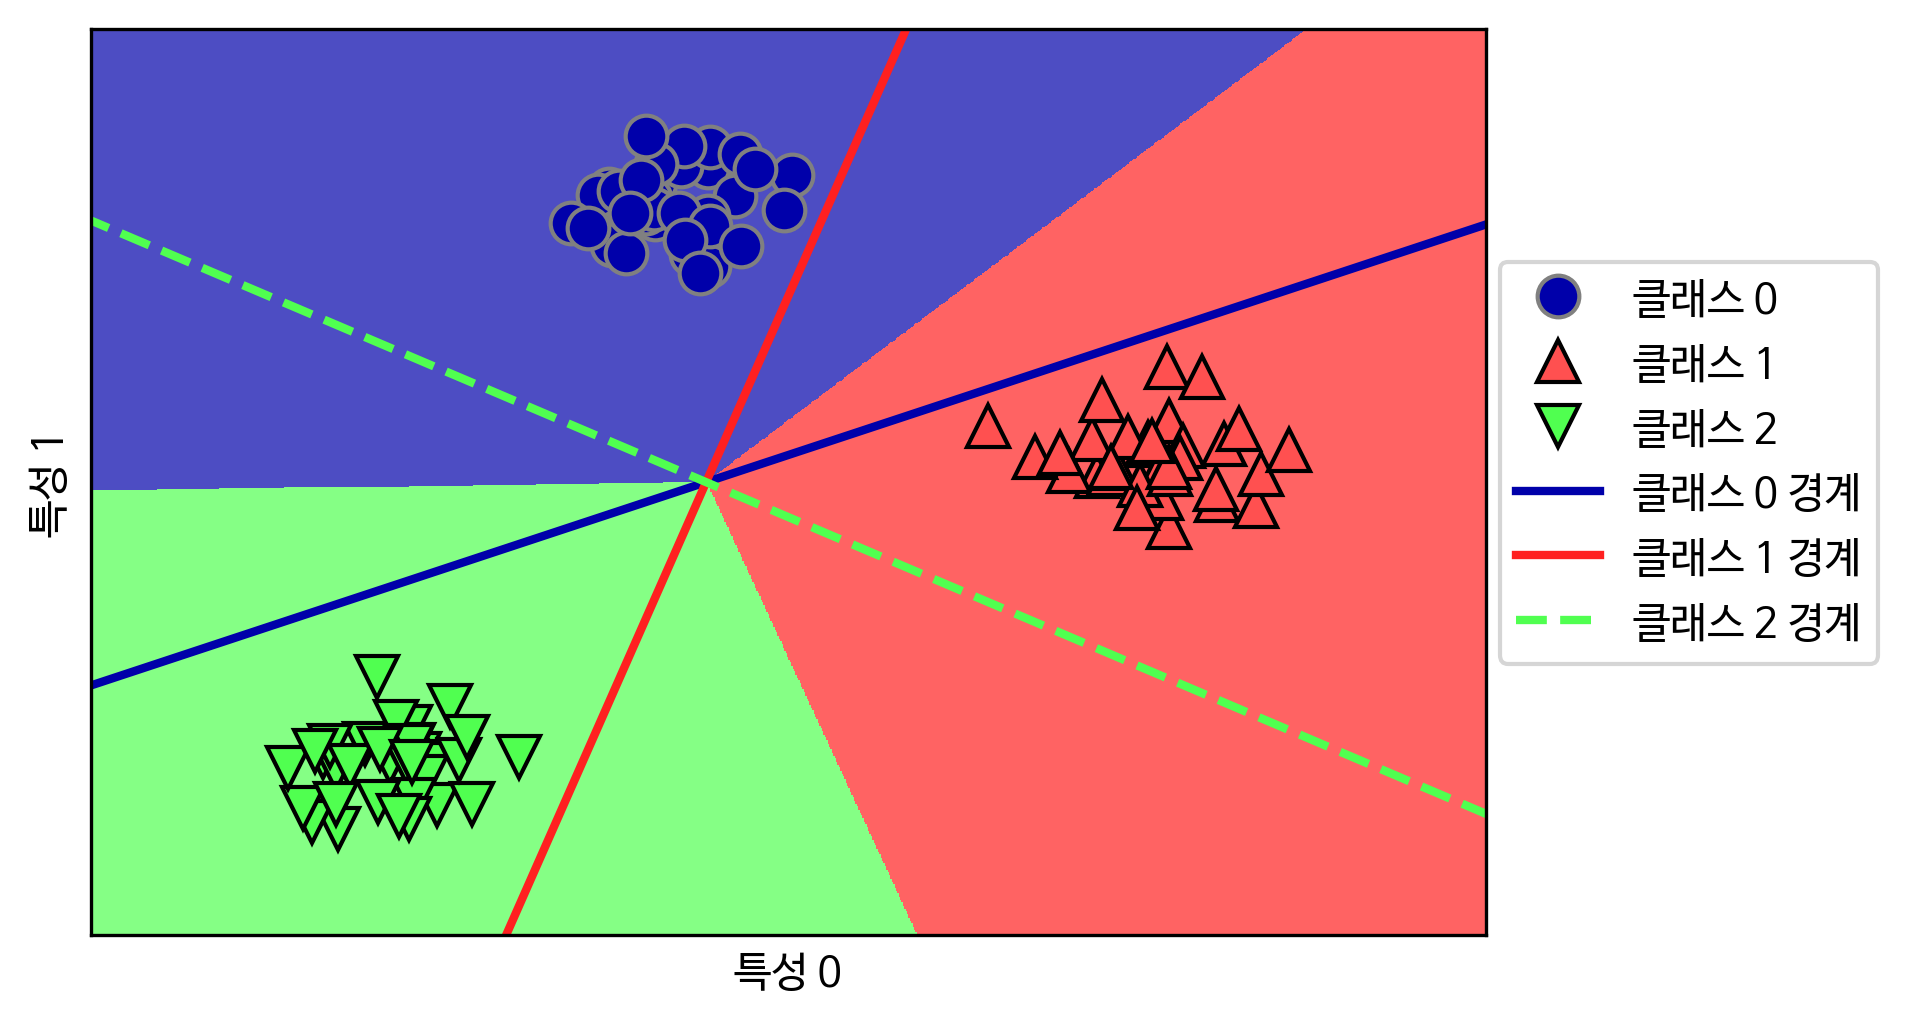

In [7]:
mglearn.plots.plot_2d_classification(logr_m, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr_m.coef_, logr_m.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

Text(0, 0.5, '특성 1')

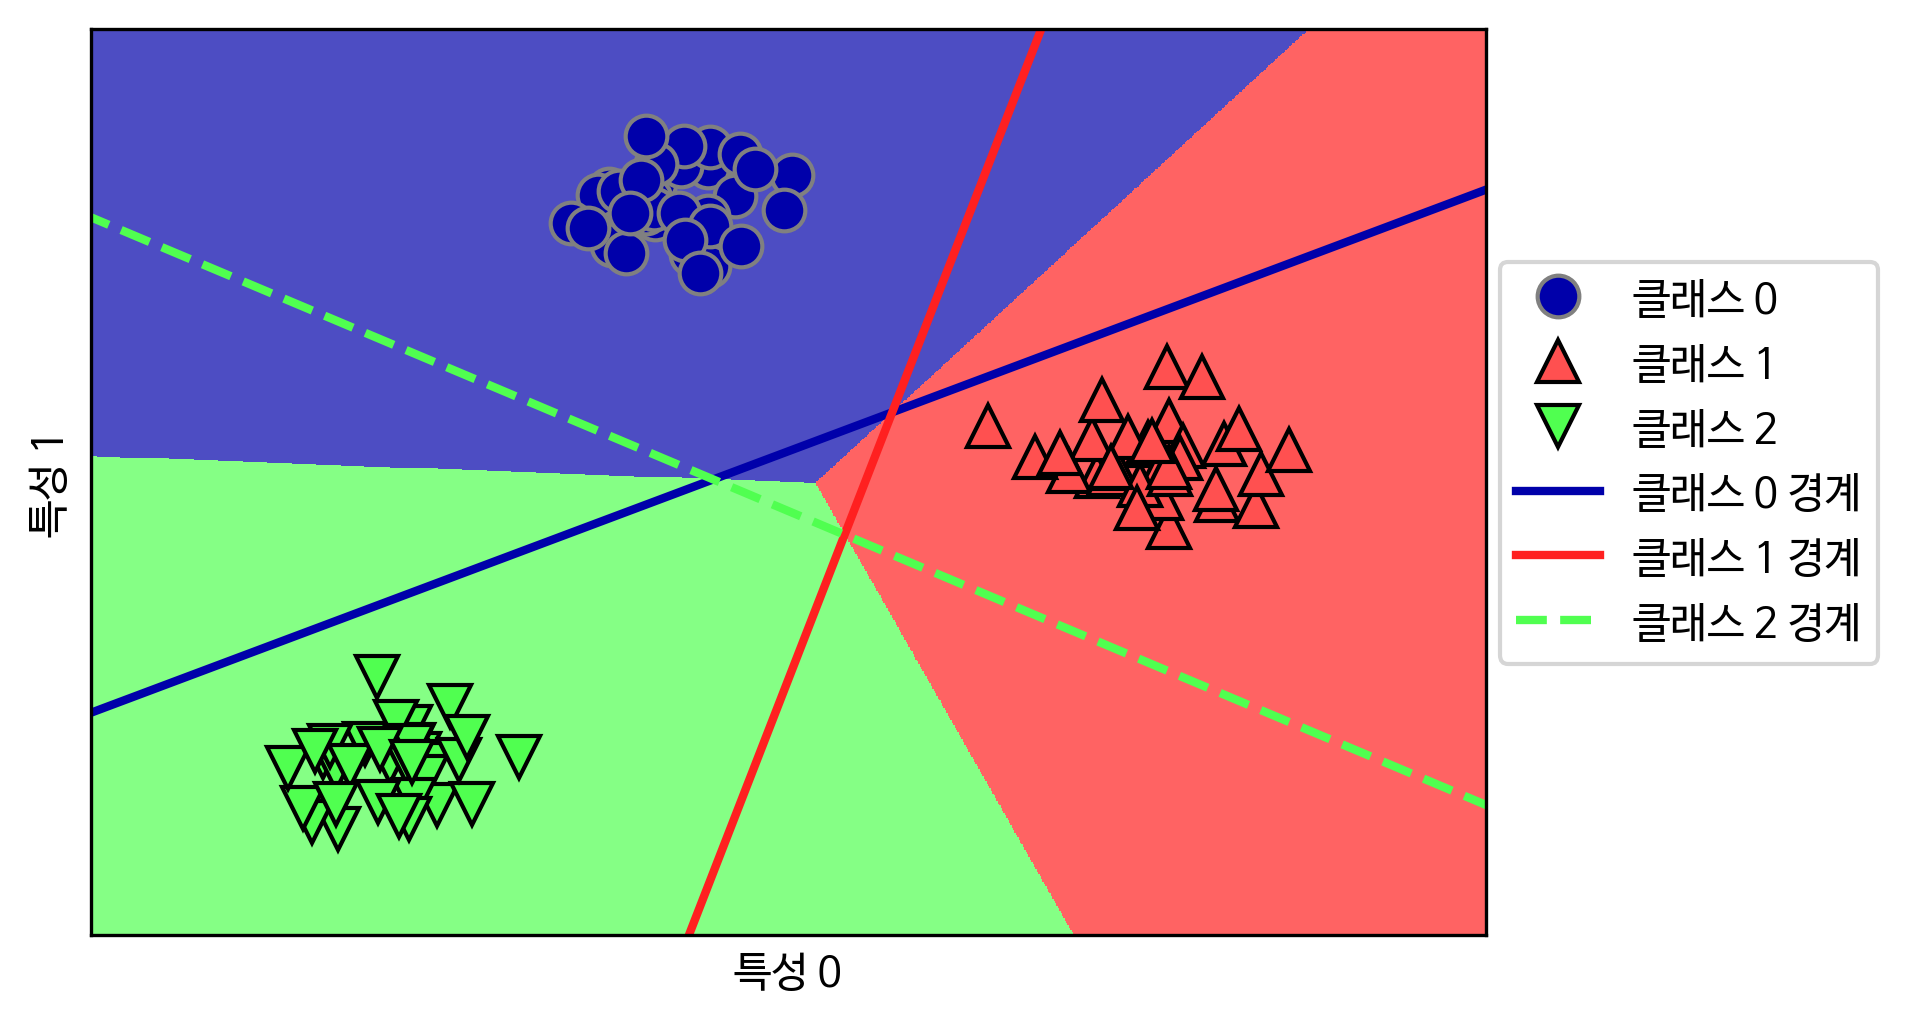

In [8]:
mglearn.plots.plot_2d_classification(logr_b, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(logr_b.coef_, logr_b.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.legend(['클래스 0', '클래스 1', '클래스 2', '클래스 0 경계', '클래스 1 경계',
            '클래스 2 경계'], loc=(1.01, 0.3))
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# Iris Logistic regression(multiclass)

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

iris_dataset = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.40)
logr_m = LogisticRegression()
logr_m.fit(X_train, y_train)
y_pred = logr_m.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도 : {:.2f}".format(logr_m.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]

테스트 세트의 정확도 : 0.92
Number of mislabeled points out of a total 60 points : 5


In [10]:
logr_b = LogisticRegression(solver='liblinear', multi_class='ovr')
logr_b.fit(X_train, y_train)
y_pred = logr_b.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\n테스트 세트의 정확도 : {:.2f}".format(logr_b.score(X_test, y_test)))
print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test != y_pred).sum()))

[[16  0  0]
 [ 0 18  5]
 [ 0  0 21]]

테스트 세트의 정확도 : 0.92
Number of mislabeled points out of a total 60 points : 5


In [11]:
print("predict : \n", logr_m.predict(X_test[:30]))
print("probability : \n", logr_m.predict_proba(X_test[:30]))

predict : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
probability : 
 [[0.    0.123 0.877]
 [0.015 0.968 0.017]
 [0.987 0.013 0.   ]
 [0.    0.041 0.959]
 [0.971 0.029 0.   ]
 [0.    0.012 0.988]
 [0.982 0.018 0.   ]
 [0.004 0.727 0.269]
 [0.002 0.761 0.236]
 [0.026 0.932 0.042]
 [0.    0.319 0.681]
 [0.01  0.784 0.206]
 [0.006 0.838 0.156]
 [0.004 0.79  0.205]
 [0.006 0.761 0.233]
 [0.983 0.017 0.   ]
 [0.009 0.796 0.195]
 [0.014 0.9   0.086]
 [0.965 0.035 0.   ]
 [0.985 0.015 0.   ]
 [0.002 0.339 0.659]
 [0.014 0.768 0.218]
 [0.945 0.055 0.   ]
 [0.972 0.028 0.   ]
 [0.002 0.536 0.462]
 [0.994 0.006 0.   ]
 [0.955 0.045 0.   ]
 [0.014 0.901 0.085]
 [0.139 0.858 0.004]
 [0.962 0.038 0.   ]]


In [12]:
print("predict : \n", logr_m.predict(X_test[:30]))
print("predict : \n", logr_b.predict(X_test[:30]))

predict : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 1 0 0 1 1 0]
predict : 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 2 0 0 2 0 0 1 1 0]


### 파라미터 튜닝

In [13]:
for solver in ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']:
    for multi_class in ['ovr', 'multinomial']:
        print(solver, multi_class)
        try:
            logr = LogisticRegression(solver=solver, multi_class=multi_class, max_iter=100000)
            logr.fit(X_train, y_train)
            y_pred = logr.predict(X_test)

            cm = confusion_matrix(y_test, y_pred)
            print(cm)
        except:
            print("ERROR")

newton-cg ovr
[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]
newton-cg multinomial
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
lbfgs ovr
[[16  0  0]
 [ 0 20  3]
 [ 0  3 18]]
lbfgs multinomial
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
liblinear ovr
[[16  0  0]
 [ 0 18  5]
 [ 0  0 21]]
liblinear multinomial
ERROR
sag ovr
[[16  0  0]
 [ 0 20  3]
 [ 0  2 19]]
sag multinomial
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]
saga ovr
[[16  0  0]
 [ 0 21  2]
 [ 0  2 19]]
saga multinomial
[[16  0  0]
 [ 0 22  1]
 [ 0  4 17]]


# IRIS 분류 : Naive Bayesian Classifier

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris_dataset = load_iris()
for test_size in [0.25, 0.3, 0.33, 0.4]:
    X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=test_size)
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    nErrors = (y_test != y_pred).sum()
    accuracy = 1.0 - nErrors / y_test.shape[0]
    print("test_size : ", test_size)
    print("Accuracy : ", accuracy)
    print("Number of mislabeled points out of a total %d points : %d"%(X_test.shape[0], (y_test != y_pred).sum()))

test_size :  0.25
Accuracy :  1.0
Number of mislabeled points out of a total 38 points : 0
test_size :  0.3
Accuracy :  1.0
Number of mislabeled points out of a total 45 points : 0
test_size :  0.33
Accuracy :  0.96
Number of mislabeled points out of a total 50 points : 2
test_size :  0.4
Accuracy :  0.9333333333333333
Number of mislabeled points out of a total 60 points : 4


# Cancer data : Naive Bayesian Classifier

In [15]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
classifier = GaussianNB().fit(X_train, y_train)
print("훈련 세트 점수 : {:.3f}".format(classifier.score(X_train, y_train)))
print("테스트 세트 점수 : {:.3f}".format(classifier.score(X_test, y_test)))

훈련 세트 점수 : 0.946
테스트 세트 점수 : 0.937


# 결정트리(make_moons)

In [16]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 데이터 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 데이터 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.840


In [17]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("훈련 데이터 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 데이터 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

훈련 데이터 정확도 : 0.933
테스트 데이터 정확도 : 0.800


# 결정트리(cancer data)

In [18]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
print("X_train.shape : {}".format(X_train.shape), "X_test.shape : {}".format(X_test.shape))

for max_depth in [1, 4, 8]:
    tree = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    tree.fit(X_train, y_train)
    print("max_depth : {}".format(max_depth))
    print("훈련 데이터 정확도 : {:.3f}".format(tree.score(X_train, y_train)))
    print("테스트 데이터 정확도 : {:.3f}".format(tree.score(X_test, y_test)))

X_train.shape : (426, 30) X_test.shape : (143, 30)
max_depth : 1
훈련 데이터 정확도 : 0.923
테스트 데이터 정확도 : 0.923
max_depth : 4
훈련 데이터 정확도 : 0.988
테스트 데이터 정확도 : 0.951
max_depth : 8
훈련 데이터 정확도 : 1.000
테스트 데이터 정확도 : 0.937


# 결정트리 출력

In [19]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=['악성', '양성'], feature_names=cancer.feature_names, impurity=False, filled=True)

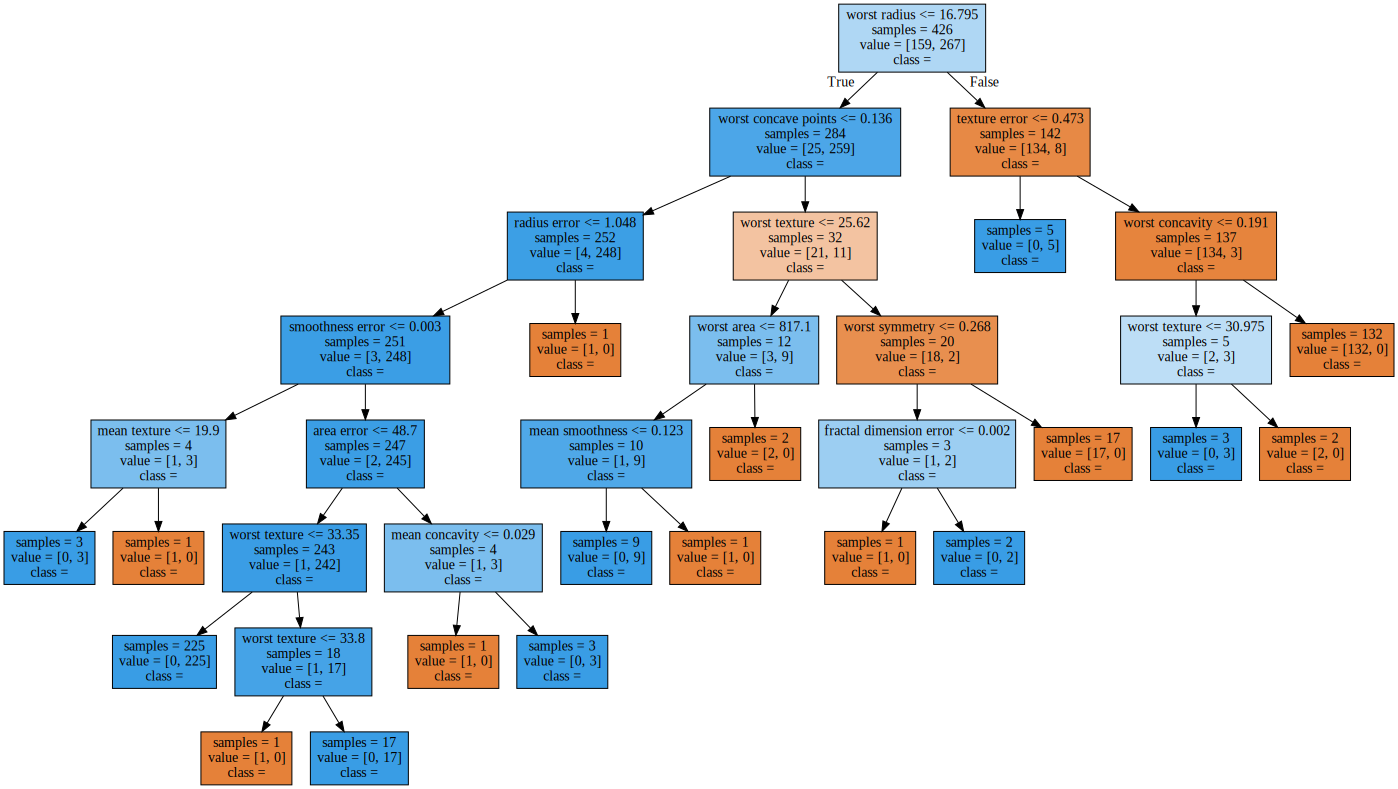

In [20]:
import graphviz

with open("tree.dot", encoding="UTF8") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

# 특성 중요도

In [21]:
print("특성 중요도 : \n{}".format(tree.feature_importances_))

특성 중요도 : 
[0.    0.008 0.    0.    0.009 0.    0.008 0.    0.    0.    0.01  0.046
 0.    0.002 0.002 0.    0.    0.    0.    0.007 0.695 0.054 0.    0.014
 0.    0.    0.017 0.117 0.011 0.   ]


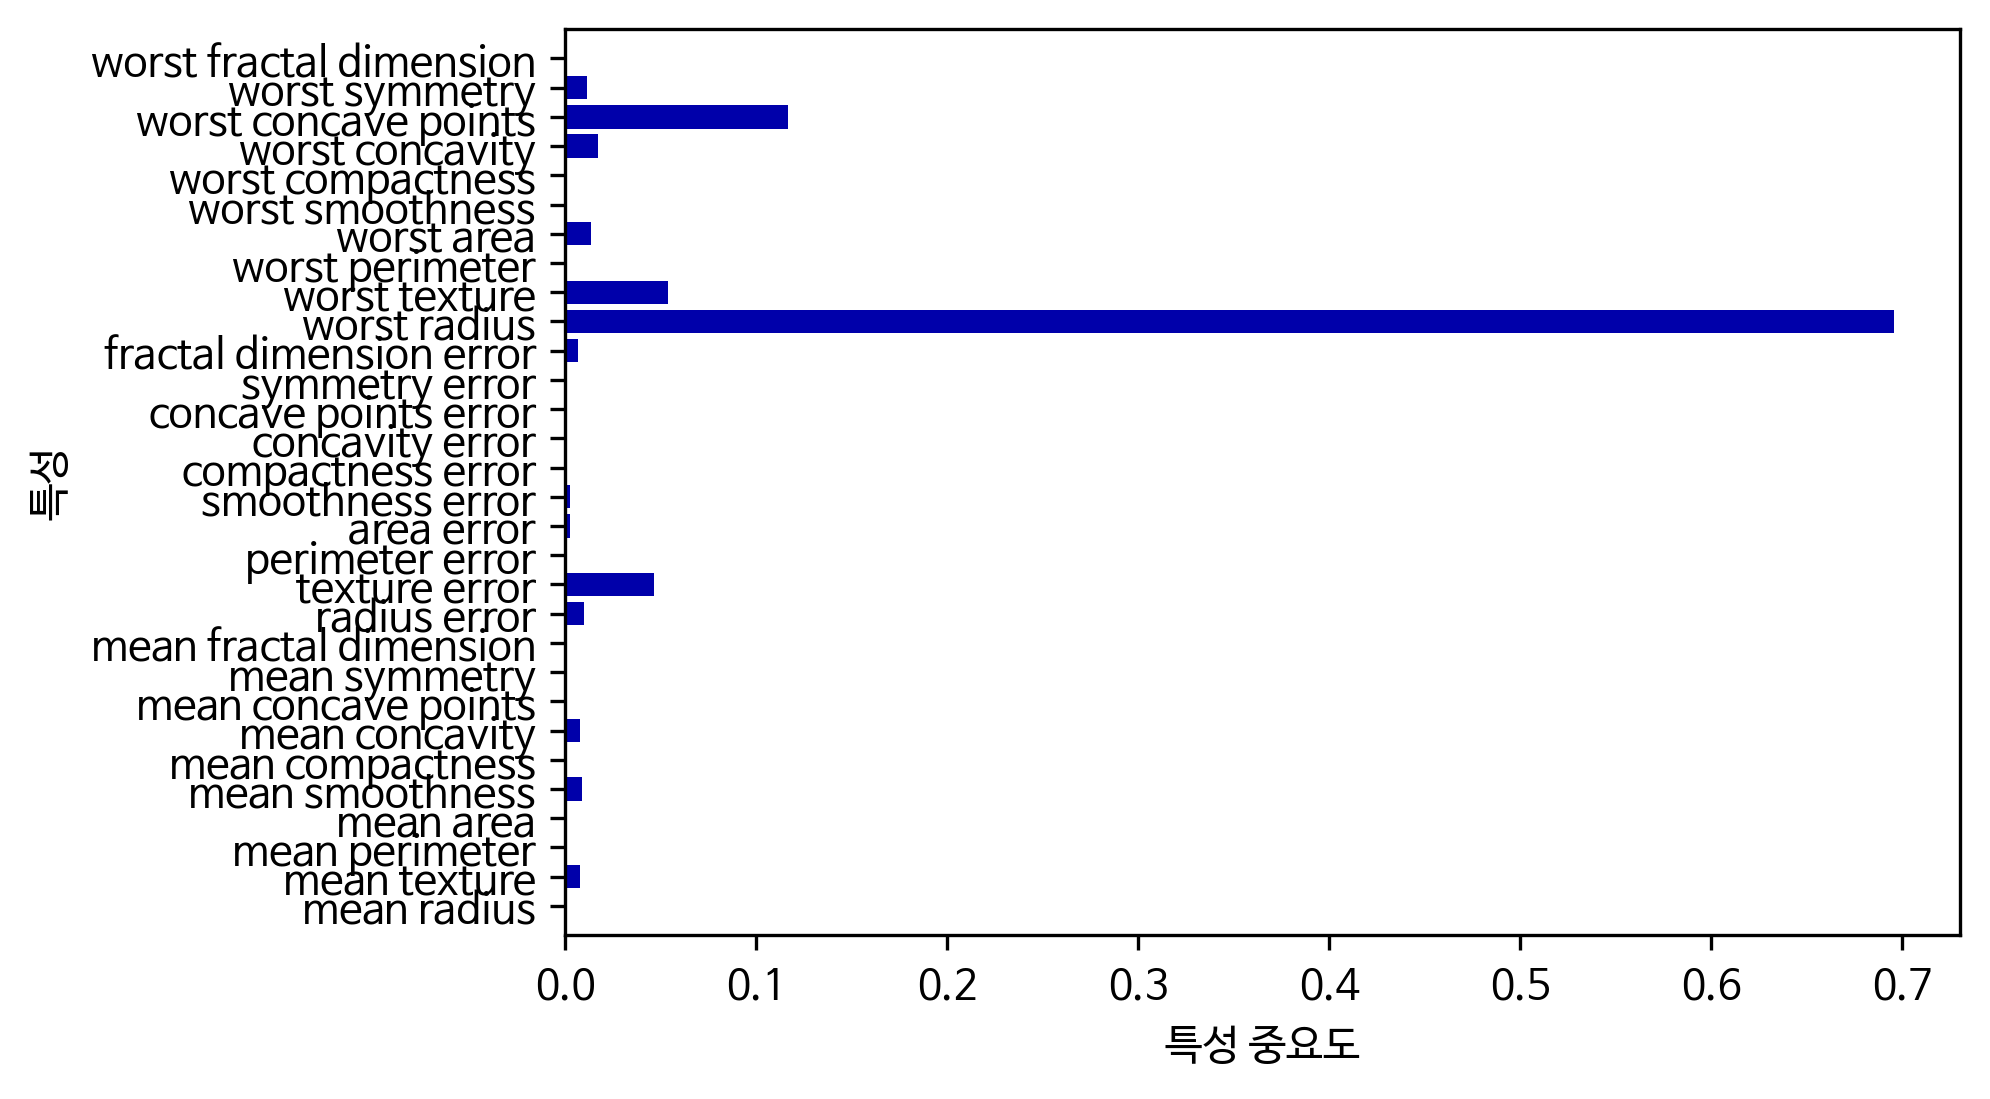

In [22]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

# 특성과 클래스 사이의 관계

Feature importances: [0. 1.]


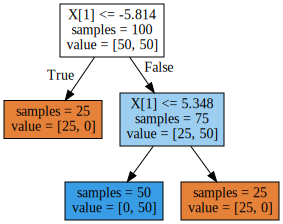

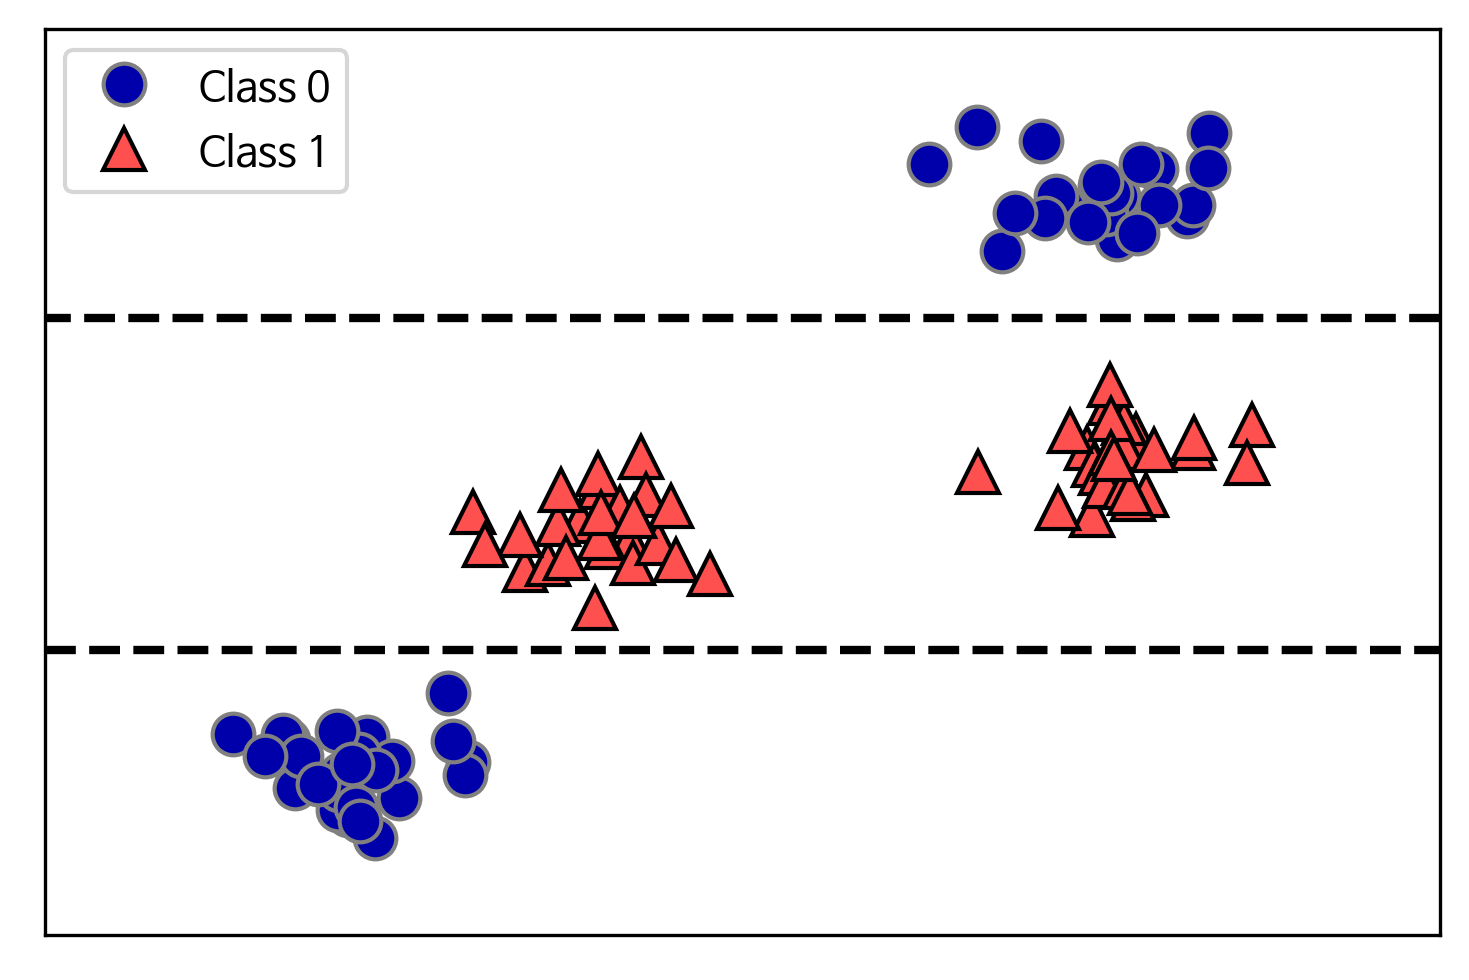

In [23]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

# 결정트리회귀(Decision tree regressor)

ram_prices.shape : (333, 3)
ram_prices.keys : Index(['Unnamed: 0', 'date', 'price'], dtype='object')
   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06
3           3  1965.0  2.64e+06
4           4  1970.0  7.34e+05


Text(0, 0.5, '가격 ($/Mbyte)')

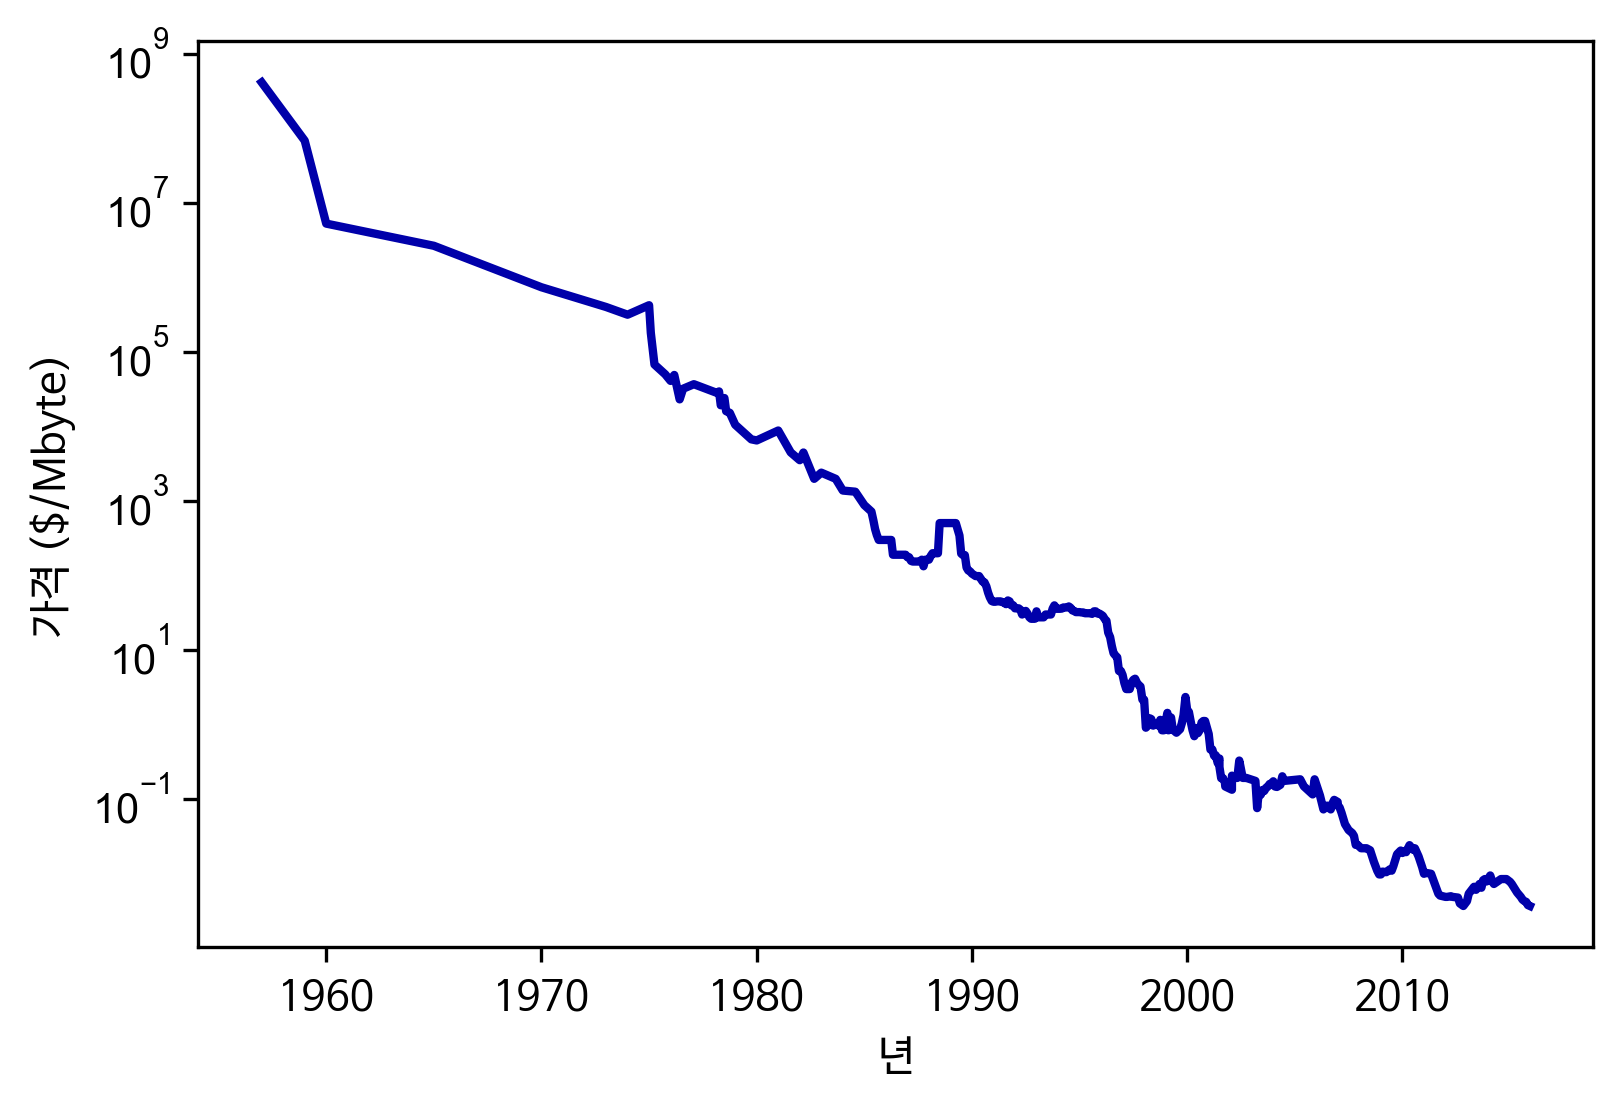

In [24]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

print("ram_prices.shape : {}".format(ram_prices.shape))
print("ram_prices.keys : {}".format(ram_prices.keys()))
print(ram_prices[:5])

plt.yticks(fontname = "Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte)")

# 결정트리회귀 vs 선형 회귀

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
# 2000년 이전을 훈련 데이터로, 2000년 이후를 테스트 데이터로 만듭니다
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print(f"data_train.shape : {data_train.shape}, data_test.shape : {data_test.shape}")

# 가격 예측을 위해 날짜 특성만을 이용합니다
X_train = data_train.date.to_numpy()[:, np.newaxis]
# 데이터와 타깃 사이의 관계를 간단하게 만들기 위해 로그 스케일로 바꿉니다
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행합니다
X_all = ram_prices.date.to_numpy()[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# 예측한 값의 로그 스케일을 되돌립니다
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

data_train.shape : (202, 3), data_test.shape : (131, 3)


# 회귀 예측 비교

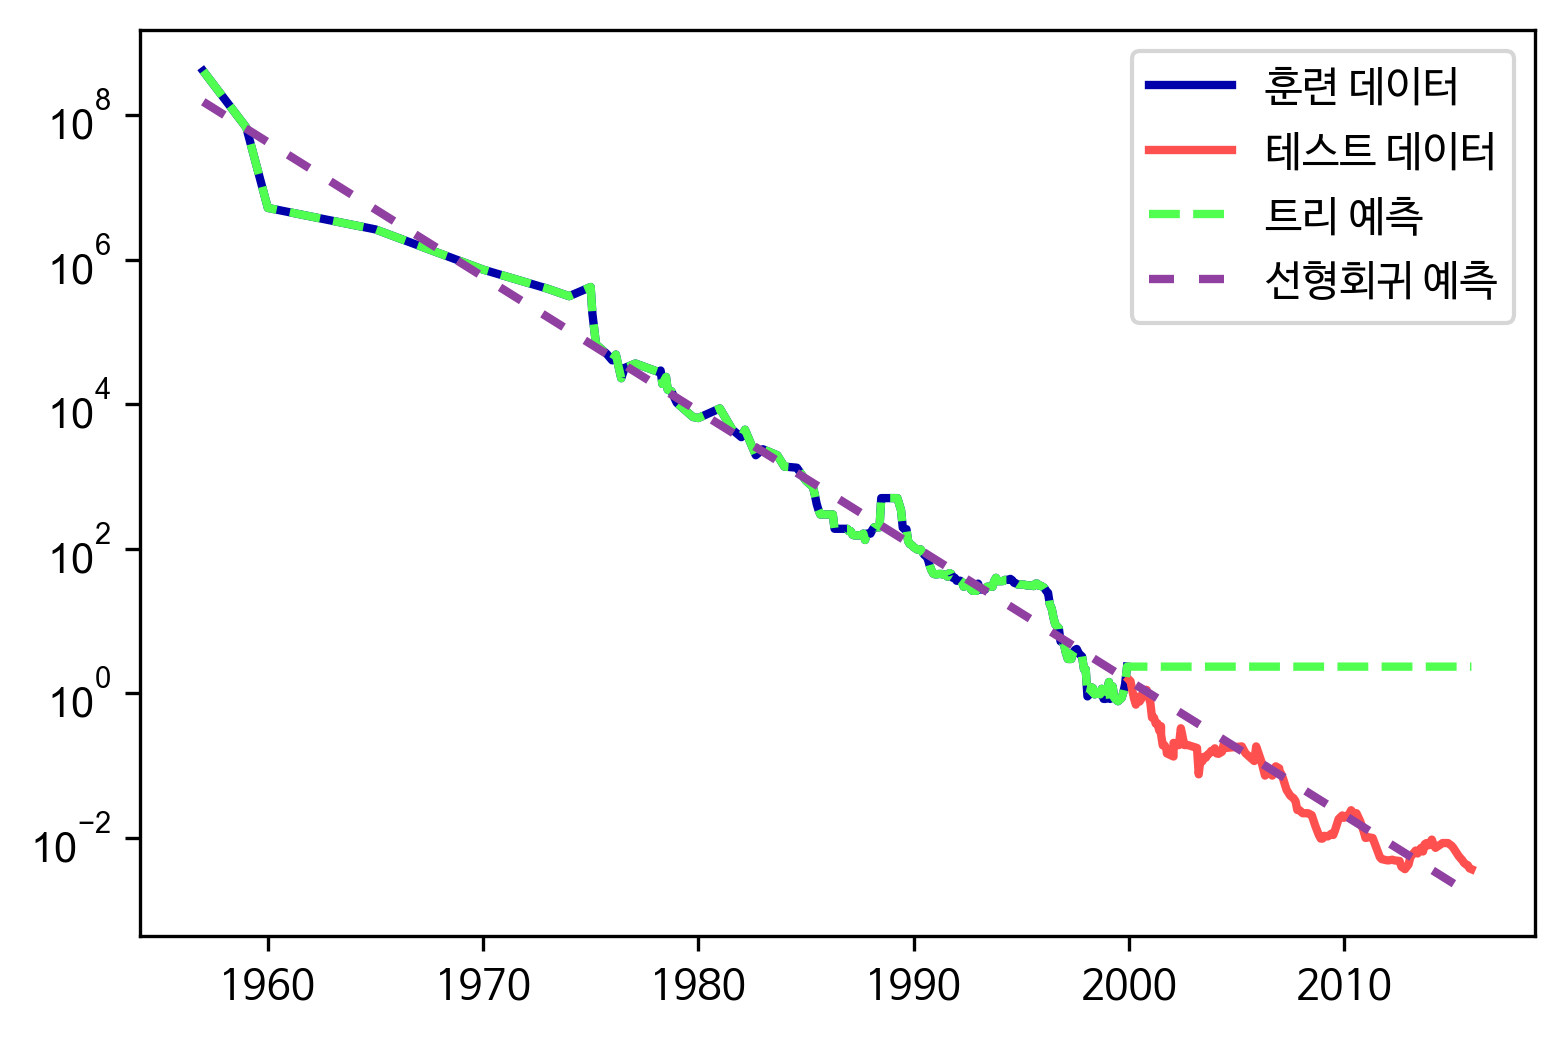

In [26]:
plt.yticks(fontname = "Arial")
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형회귀 예측")
plt.legend()

# 붓꽃(Iris) + Decision Tree Classifier(품종 분류)

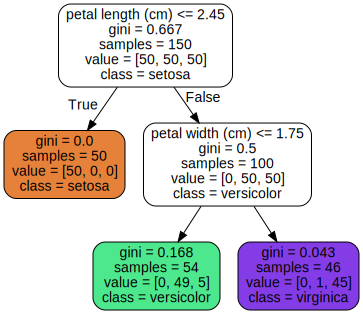

In [27]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

export_graphviz(tree_clf, out_file="iris_tree.dot", feature_names=iris.feature_names[2:], class_names=iris.target_names, rounded=True, filled=True)
graphviz.Source.from_file("iris_tree.dot")

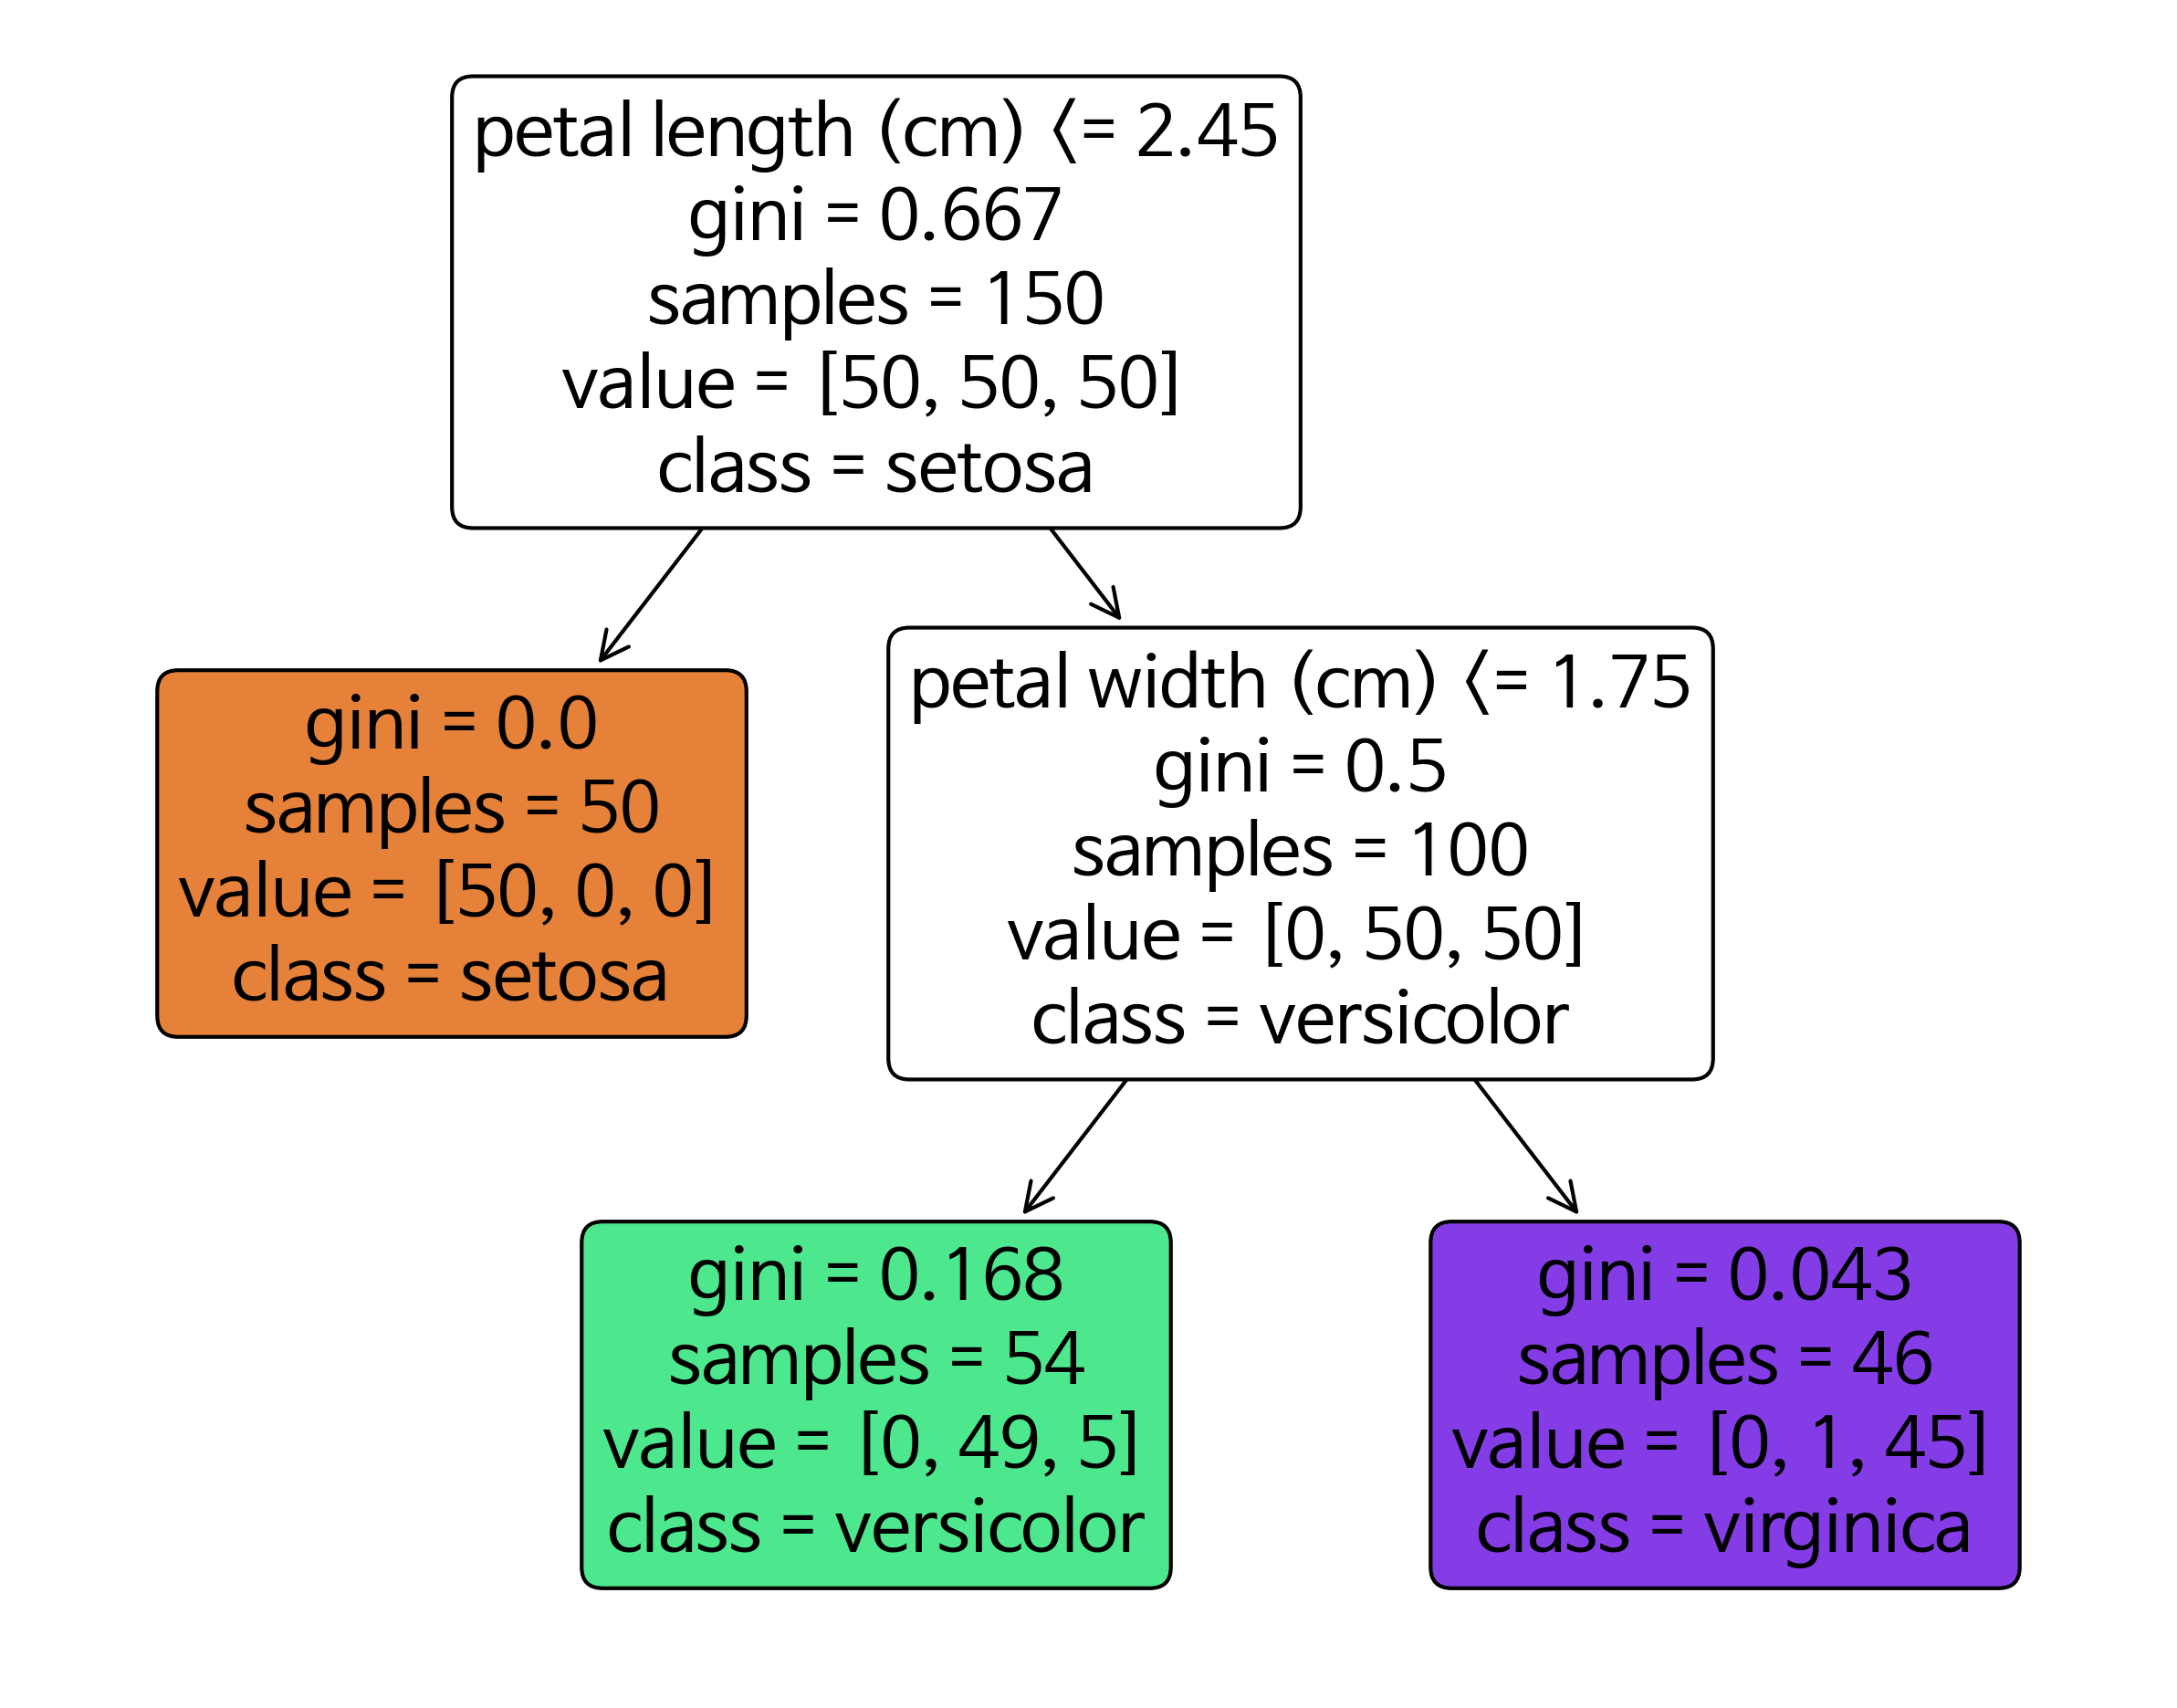

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded=True, max_depth=2, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()

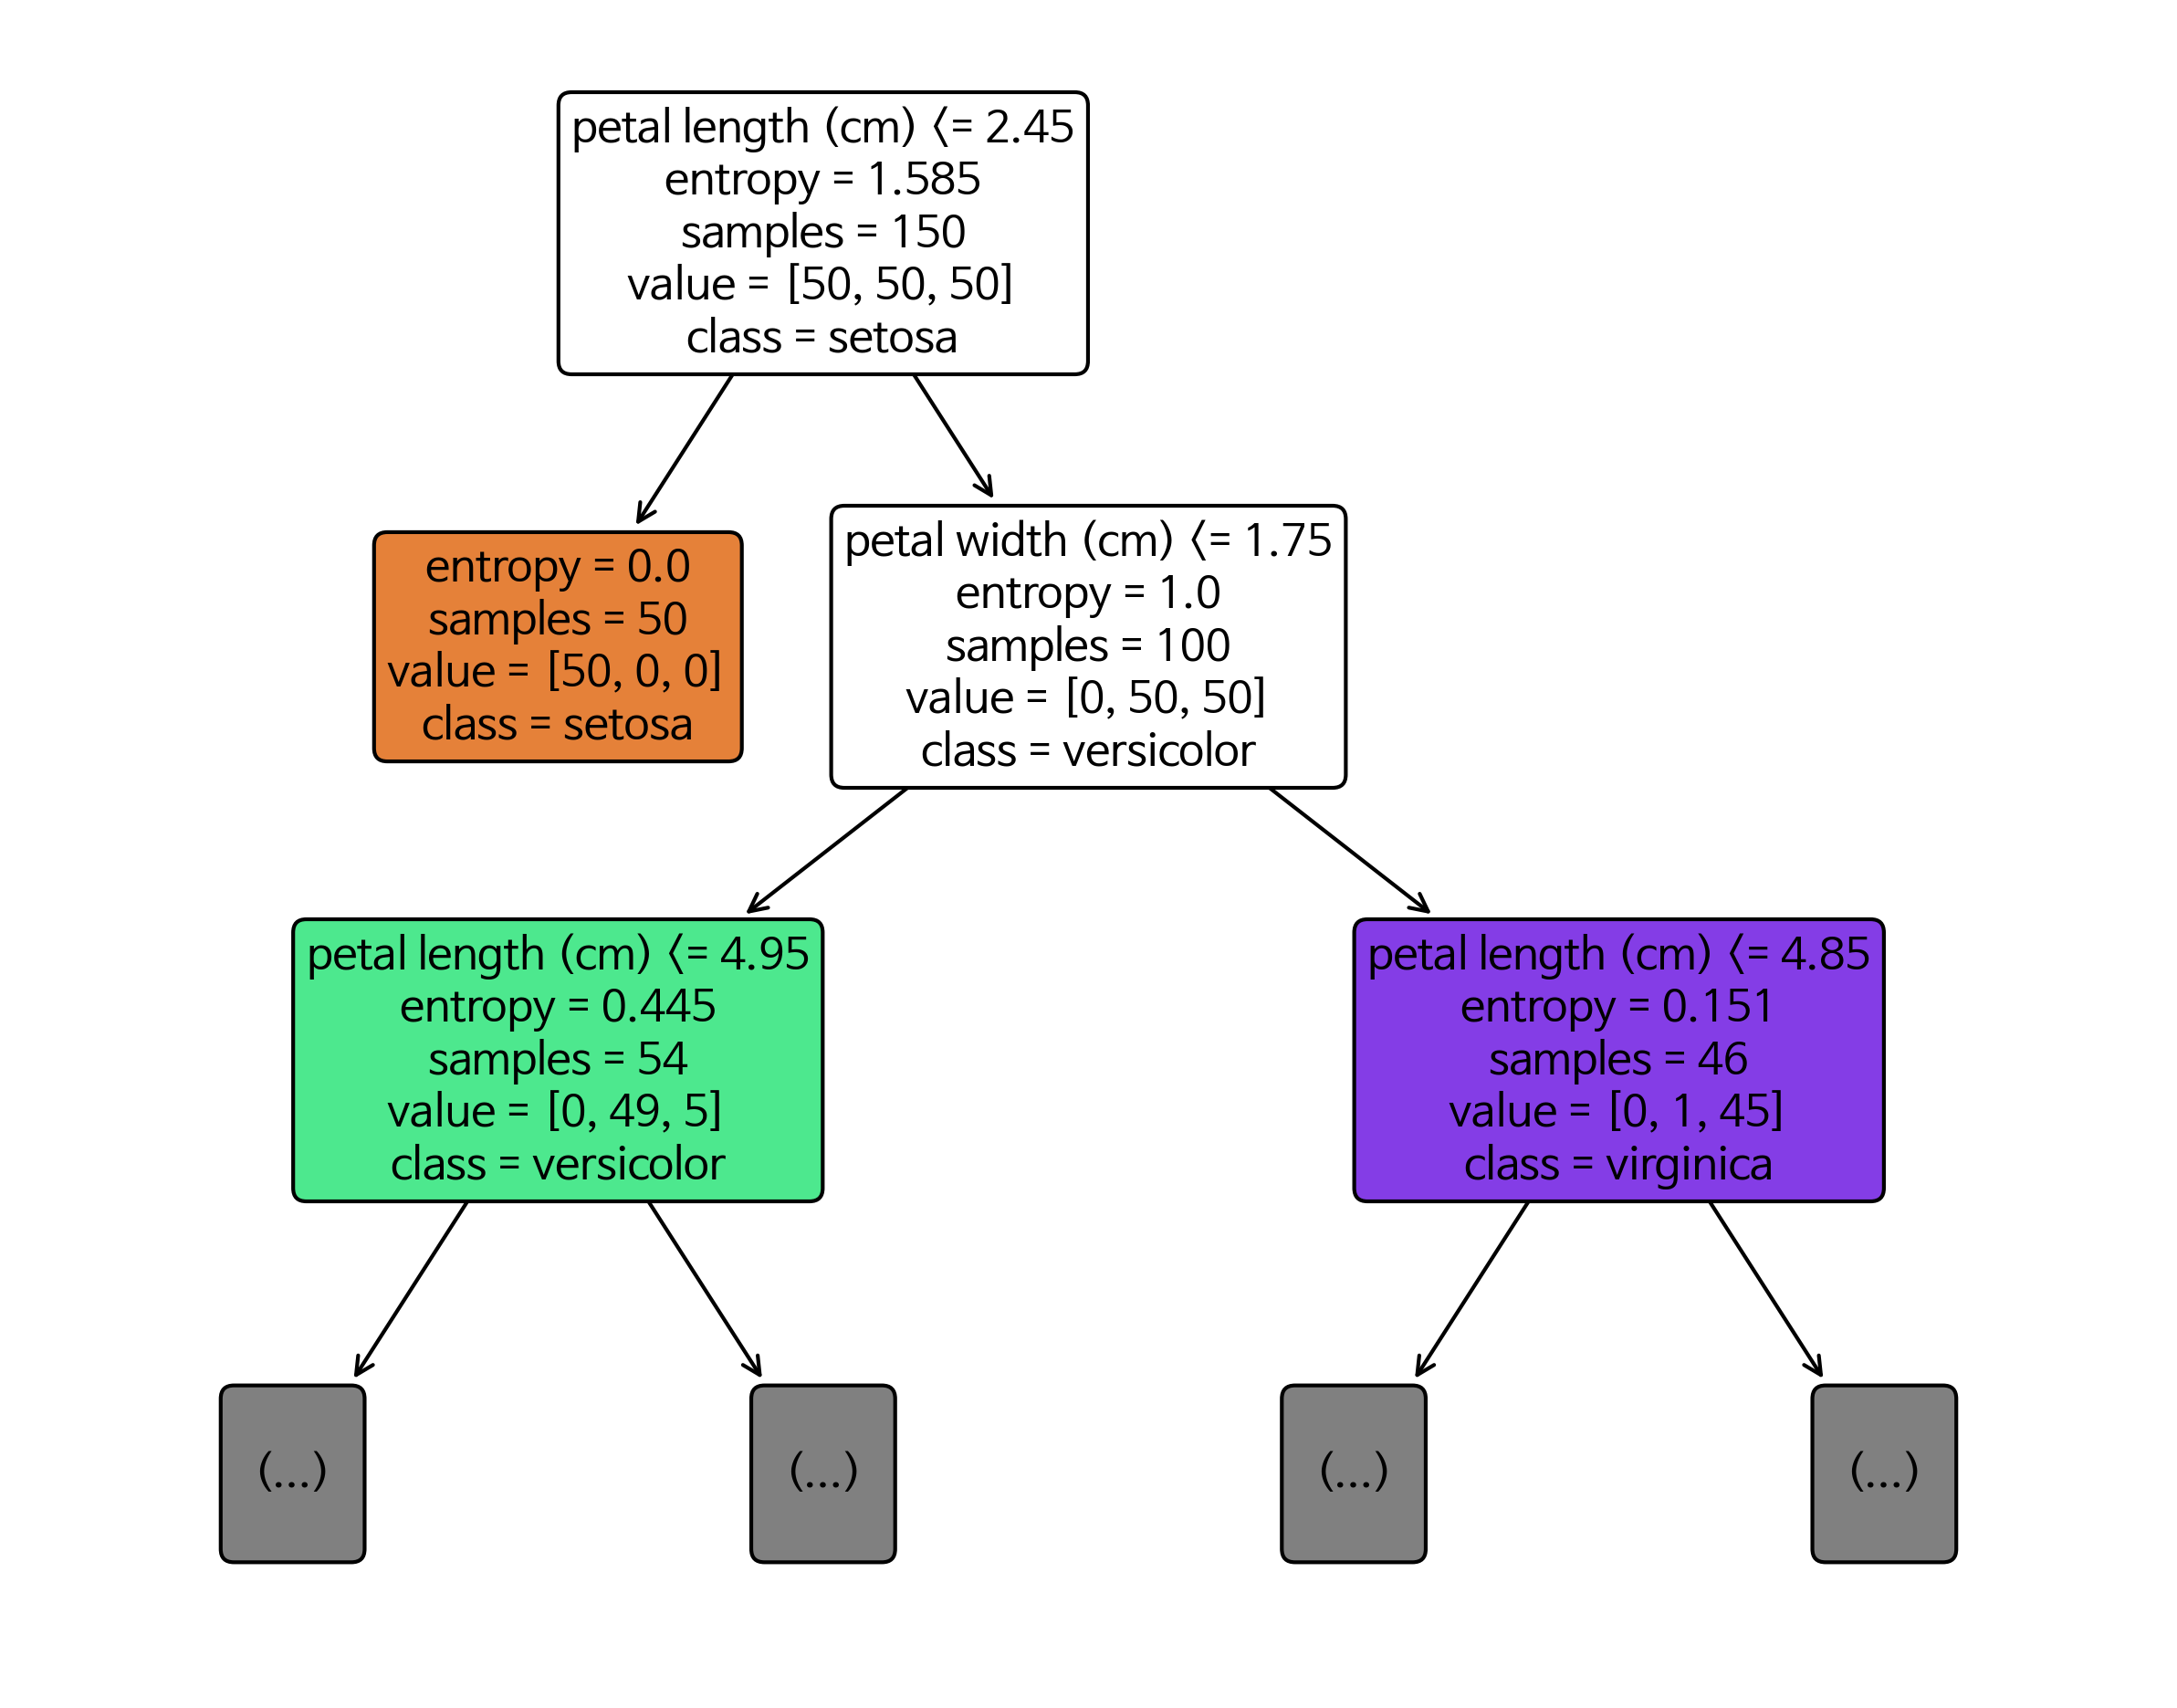

In [29]:
tree_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
tree_clf.fit(X, y)

plt.figure(figsize=(10,8))
plot_tree(tree_clf, filled=True, rounded=True, max_depth=2, feature_names=iris.feature_names[2:], class_names=iris.target_names)
plt.show()